# Закономерности, определяющие успешность игры

<b>Описание проекта</b> <br>
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<bR>
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.<bR>
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<b>Описание данных</b>

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

<b>Шаг 1. Откройте файл с данными и изучите общую информацию</b>

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Датафрейм содержит 16,7 тысяч строк и 11 столбцов. Столбецы NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score, содержат данные не целочисленного типа. Есть пропуски в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.

<b>Шаг 2. Подготовьте данные

<b>2.1 Замените названия столбцов (приведите к нижнему регистру)

In [3]:
data.columns = [x.lower() for x in data.columns]
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<b>2.2 Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

In [4]:
#перевод данных в нужный формат
data['na_sales'] = data['na_sales'].astype('float')
data['eu_sales'] = data['eu_sales'].astype('float')
data['jp_sales'] = data['jp_sales'].astype('float')

<b>2.3 Обработайте пропуски при необходимости

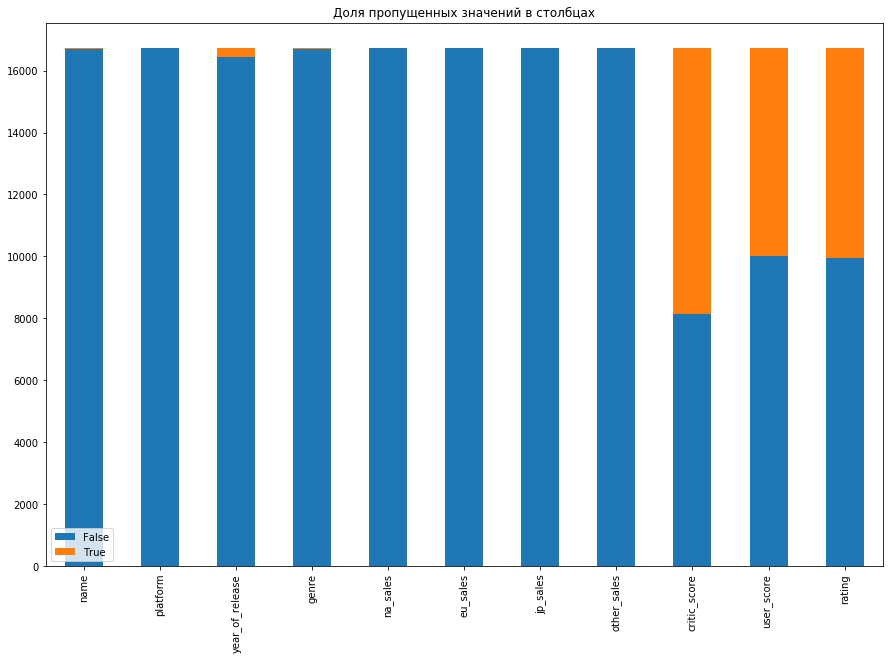

In [5]:
import matplotlib.pyplot as plt

data.isna().apply(pd.Series.value_counts).transpose().plot(kind = 'bar', stacked = True, figsize = (15,10), title='Доля пропущенных значений в столбцах')
plt.legend(loc='lower left')

#Гистограмма доли пропусков в столбцах. Синий – имеющиеся данные, оранжевый – пропуски. 

In [6]:
#заменяем пропуски в именах
data['name'].fillna('no_name', inplace=True)
data.loc[data['name'] == 'no_name'].shape[0]

2

In [7]:
#заменяем пропуски в годах выпуска
data['year_of_release'].fillna(0, inplace=True)
data.loc[data['year_of_release'] == 0].shape[0]

269

In [8]:
data['critic_score'].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64

In [9]:
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.9       2
1         2
1.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

В рейтинге пользователей есть значение tbd – To Be Determined, то есть рейтинг подлежит определению. Можем заменить эти значения на Nan.

In [10]:
import numpy as np
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float')
data['user_score'].value_counts()

7.8    324
8.0    290
8.2    282
8.3    254
8.5    253
      ... 
9.6      2
0.6      2
1.9      2
9.7      1
0.0      1
Name: user_score, Length: 95, dtype: int64

Не хватает информации для самостоятельной замены пустых значений в столбце rating. Поэтому оставим, как есть. Пропуски в user_score и critic_score оставляем как есть, чтобы не исказить оценки по платформам/годам/жанрам в общем.

In [11]:
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [12]:
#Удаляем строки с пропущенными значениями в жанрах
data.dropna(subset=['genre'], inplace = True)
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

In [13]:
data.duplicated().sum()

0

<b>2.4 Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [14]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Если сборы равны нулю, значит они не продавались. Поэтому удаляем оценки пользователей, если общие сборы по игре равны нулю. То же затруднительно сказать о критиках, они могу оценивать игру независимо от продаж.

In [15]:
data.query('total_sales == 0 and user_score >= 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


Поскольку нулевые значения в пользовательских оценках не заменялись на среднее значение по жанру, строк с отзывами пользователей и нулевыми продажами больше нет.

Были заменены пропуски в годах на нули, поскольку годы выпуска игр нам неизвестны. Пропуски в названиях игр заменены на no_name. Удалены пропуски с пропущенными жанрами.
Столбцы na_sales, eu_sales и jp_sales переведены в формат float, чтобы избежать потерю данных.
Для каждой игры посчитаны суммарные продажи со всех регионов – добавлен столбец 'total_sales'. 


<b>Шаг 3. Проведите исследовательский анализ данных</b>

<b>Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?</b>

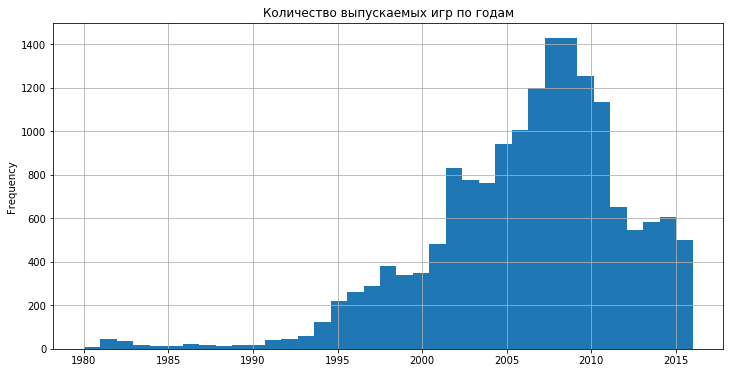

In [16]:
games_per_year = data.query('year_of_release != 0')
games_per_year['year_of_release'].plot(kind='hist', bins=37, title='Количество выпускаемых игр по годам', grid=True, figsize=(12,6))

Игры появились в 1980-х и с 1990-х их количество растет, достигая пика в 2009-2010 гг. С тех пор количество проданных игр падает, вероятно в связи с появлением смартфонов и мобильных игр.

<b>
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?<bR>
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.<bR>
- Не учитывайте в работе данные за предыдущие годы.<bR>
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.<bR>

In [17]:
platforms = data.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
platforms

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b3a3ac590>],
      dtype=object)

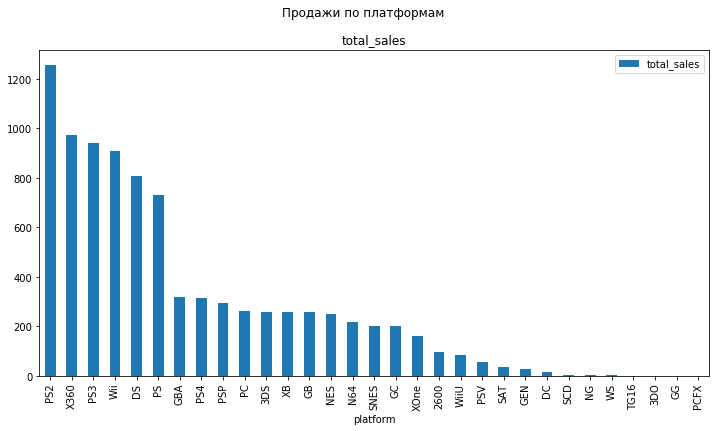

In [18]:
platforms.sort_values(by='total_sales', ascending=False).plot(kind='bar',subplots=True, figsize=(12,6), title='Продажи по платформам')

In [19]:
#Выделим топ-5 платформ по продажам
top_5_platforms = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(5)
top_5_platforms = top_5_platforms.reset_index().rename_axis(None, axis=1)
top_5_platforms

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


Возьмем актуальный период равный 10 лет. Рассмотрим продажи игр по платформам с 2006 по 2016 гг.

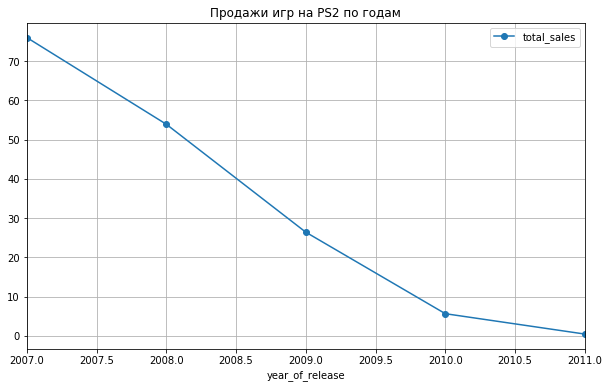

In [20]:
PS2_info = data.query('platform == "PS2" and year_of_release > 2006')
PS2_info.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .sort_values('year_of_release', ascending=False)\
    .plot(figsize=(10,6), title='Продажи игр на PS2 по годам', grid=True, style='o-')

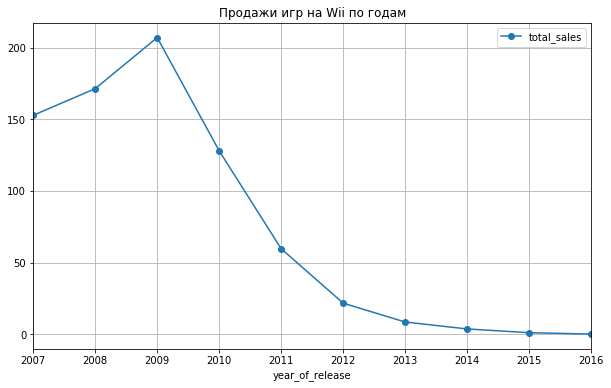

In [21]:
Wii_info = data.query('platform == "Wii" and year_of_release > 2006')
Wii_info.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .sort_values('year_of_release', ascending=False)\
    .plot(figsize=(10,6), title='Продажи игр на Wii по годам', grid=True, style='o-')

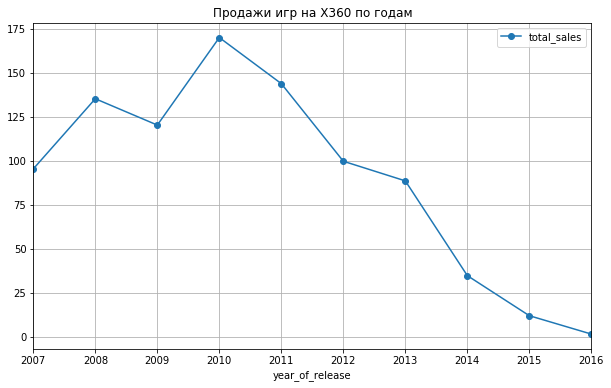

In [22]:
X360_info = data.query('platform == "X360" and year_of_release > 2006')
X360_info.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .sort_values('year_of_release', ascending=False)\
    .plot(figsize=(10,6), title='Продажи игр на X360 по годам', grid=True, style='o-')

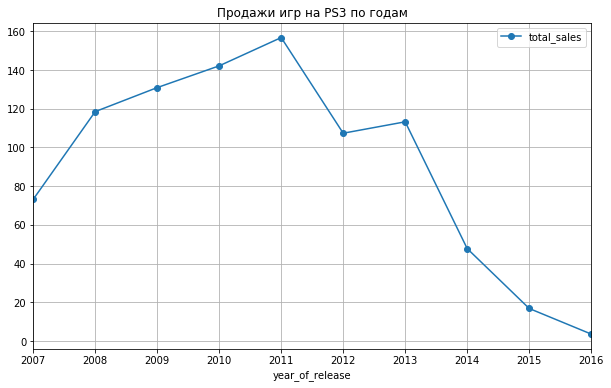

In [23]:
PS3_info = data.query('platform == "PS3" and year_of_release > 2006')
PS3_info.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .sort_values('year_of_release', ascending=False)\
    .plot(figsize=(10,6), title='Продажи игр на PS3 по годам', grid=True, style='o-')

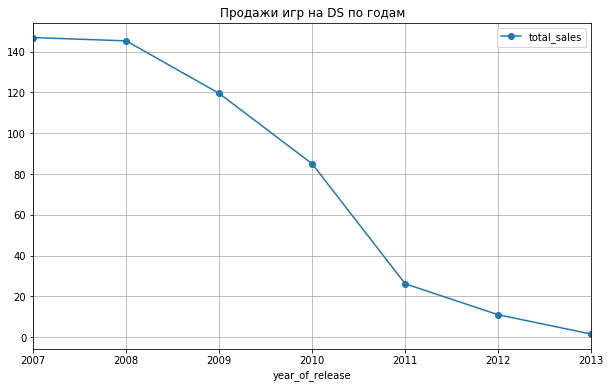

In [24]:
DS_info = data.query('platform == "DS" and year_of_release > 2006')
DS_info.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
    .sort_values('year_of_release', ascending=False)\
    .plot(figsize=(10,6), title='Продажи игр на DS по годам', grid=True, style='o-')

1. Самое большое кол-во копий продали PS2, самую меньшее кол-во – DS.
2. У Wii был резкий скачок продаж через год работы, затем идет резкий спад. 
3. Игровые платформы прибыльны примерно 10 лет и достигают пика прибыли на 3-5 год работы, затем идут на спад.
4. В целом рынок платформ идет на спад.

Популярные платформы актульного периода: 2011-2016 гг.

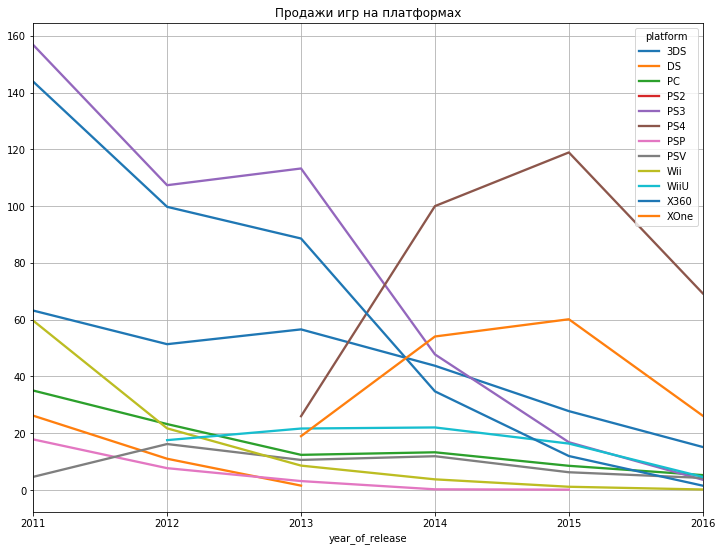

In [25]:
import seaborn as sns
platform_5_years = data.query('year_of_release >= 2011')

platform_5_years\
 .pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')\
 .plot(figsize = (12,9), grid = True, title = 'Продажи игр на платформах', linewidth = 2.3)

In [26]:
platform_3_years = data.query('year_of_release >= 2013').pivot_table(index = 'platform', columns = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
platform_3_years['sum'] = platform_3_years[2013.0]+platform_3_years[2014.0]+platform_3_years[2015.0]+platform_3_years[2016.0]
platform_3_years.fillna(0, inplace=True)
platform_3_years.sort_values(by='sum', ascending=False)

year_of_release,2013.0,2014.0,2015.0,2016.0,sum
platform,,,,,
PS4,25.99,100.00,118.90,69.25,314.14
PS3,113.25,47.76,16.82,3.60,181.43
XOne,18.96,54.07,60.14,26.15,159.32
3DS,56.57,43.76,27.78,15.14,143.25
X360,88.58,34.74,11.96,1.52,136.80
WiiU,21.65,22.03,16.35,4.60,64.63
PC,12.38,13.28,8.52,5.25,39.43
PSV,10.59,11.90,6.25,4.25,32.99
Wii,8.59,3.75,1.14,0.18,13.66


Платформы-лидеры в актуальном периоде: PS4, XOne, 3DS, PC, WiiU. На ближайший год стоит ориентироваться на эти платформы. В целом продажи всех платформ падают, но некоторые из них не достигли своего потенциального пика, который может наступить в течение ближайших лет. Самые низкие продажи у Wii, X360 и PS3. 

<b>Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [27]:
platform_5_years

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Text(0.5, 1.0, 'Диаграмма размаха по продажам игр в разбивке по платформам')

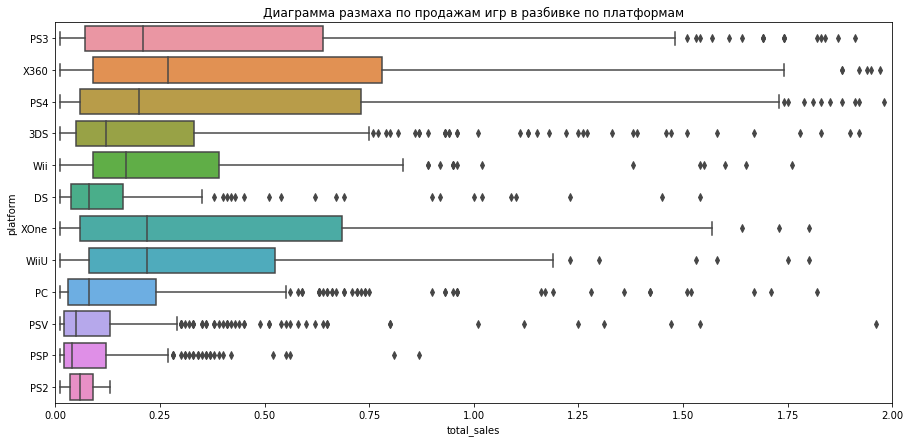

In [28]:
fig, ax = plt.subplots(figsize = (15,7))
sns.boxplot(data = data.query('year_of_release >= 2011'), x= 'total_sales', y = 'platform', orient = 'h')
 
plt.xlim(0,2)
plt.title('Диаграмма размаха по продажам игр в разбивке по платформам')

- Исходя из графика с усами видно, что медиана протекает у всех по разному.
- У каждой платформы большое количество выбросов.

<b>Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [29]:
platform_5_years

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [30]:
data_platforms = platform_5_years[['platform', 'user_score','critic_score','total_sales']]
data_platforms['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'Wii', 'DS', 'XOne', 'WiiU', 'PC',
       'PSV', 'PSP', 'PS2'], dtype=object)

In [31]:
#общая зависимость оценки пользователей от оценки критиков
data_platforms['user_score'].corr(data_platforms['critic_score'])

0.5348532967085246

Слабая зависимость между отзывами потребителей и критиков и количеством проданных игр.

In [32]:
#общая зависимость количества проданных игр от оценок критиков
data_platforms['critic_score'].corr(data_platforms['total_sales'])

0.3299765050114586

Практически отсутствует зависимость между отзывами критиков и количеством проданных игр.

In [33]:
#общая зависимость количества проданных игр от оценок пользователей
data_platforms['user_score'].corr(data_platforms['total_sales'])

0.031636127725592864

Практически отсутствует зависимость между отзывами критиков и отзывами потребителей.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b19dc2410>,
      dtype=object)

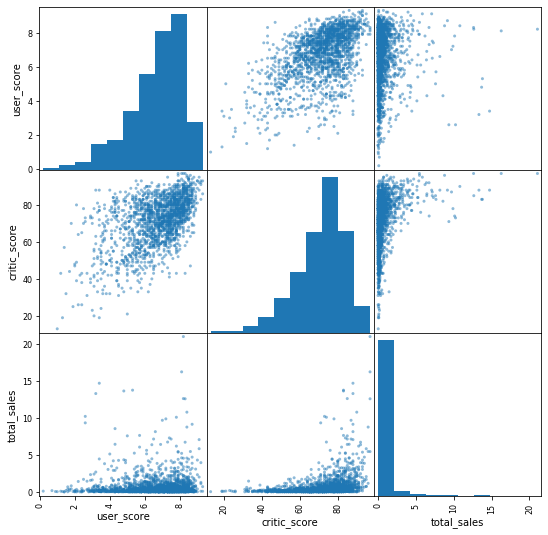

In [34]:
pd.plotting.scatter_matrix(data_platforms, figsize=(9, 9), alpha=0.5)

In [35]:
#зависимость оценки пользователей от оценки критиков PS4
data_ps4 = data_platforms.query('platform == "PS4"')
data_ps4['user_score'].corr(data_ps4['critic_score'])

0.5576539782764632

In [36]:
#зависимость проданных игр от оценки критиков PS4
data_ps4['critic_score'].corr(data_ps4['total_sales'])

0.40656790206178095

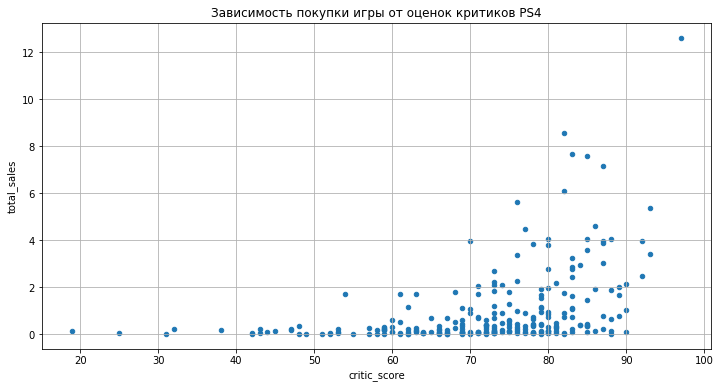

In [37]:
data_ps4.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(12,6), grid=True, title='Зависимость покупки игры от оценок критиков PS4')

Есть слабая зависимость между отзывами критиков и отзывами пользователей PS4.

На диаграмме рассеивания видно, что с повышением оценки критиков (от 60 до 95), увеличивается количество покупок. <bR> Согласно коэффициенту Пирсена, зависимость между этими двумя показателями слабая и составляет 0.407. Значит пользователи больше прислушиваются к оценки экспертов, чем пользователей.

In [38]:
#зависисимость кол-ва проданных PS4 от оценки пользователей
data_ps4['total_sales'].corr(data_ps4['user_score'])

-0.031957110204556376

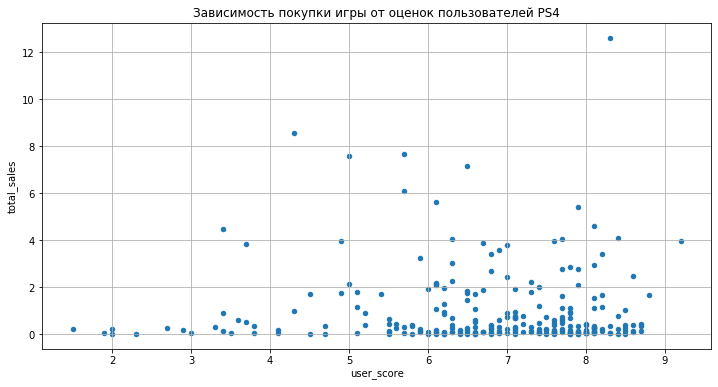

In [39]:
data_ps4.plot(x='user_score', y='total_sales', kind='scatter', figsize=(12,6), grid=True, title='Зависимость покупки игры от оценок пользователей PS4')

Отсутствует зависимость между отзывами пользователей и количеством проданных игр.

На диаграмме рассеивания видно, что с повышением оценки покупателей (от 5,5 до 8.8), увеличивается количество покупок. <bR> Согласно коэффициенту Пирсена, между показателями нет зависимости. Поэтому скорее всего это выбросы.

<b>Соотнесите выводы с продажами игр на других платформах.

<b>XOne

In [40]:
data_xone = data_platforms.query('platform == "XOne"')
data_xone['total_sales'].corr(data_xone['user_score'])

-0.06892505328279412

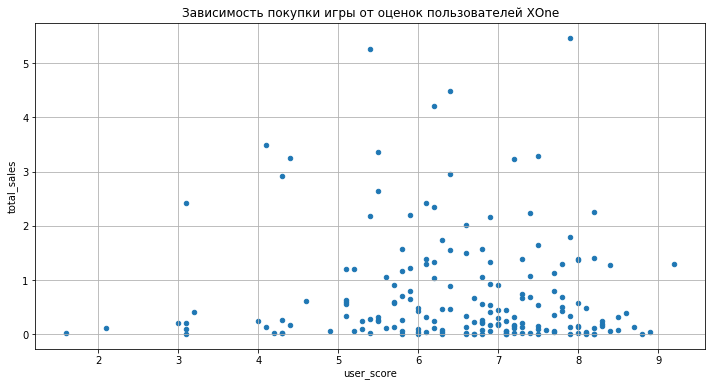

In [41]:
data_xone.plot(x='user_score', y='total_sales', kind='scatter', figsize=(12,6), grid=True, title='Зависимость покупки игры от оценок пользователей XOne')

In [42]:
data_xone['total_sales'].corr(data_xone['critic_score'])

0.41699832800840175

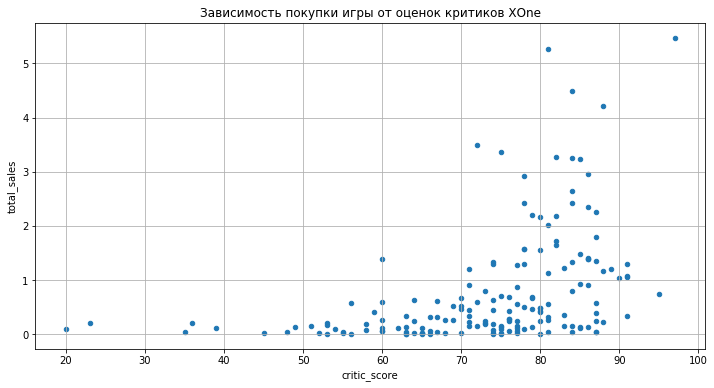

In [43]:
data_xone.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(12,6), grid=True, title='Зависимость покупки игры от оценок критиков XOne')

In [44]:
data_xone['user_score'].corr(data_xone['critic_score'])

0.4724621124165802

Отсутствует связь между оценками пользователей и количеством проданных игр. Есть слабая зависимость между оценками критиков и количеством проданных игр, а также между оценками критиков и пользователей.

<b>3DS

In [45]:
data_3ds = data_platforms.query('platform == "3DS"')
data_3ds['total_sales'].corr(data_3ds['user_score'])

0.22207843643390884

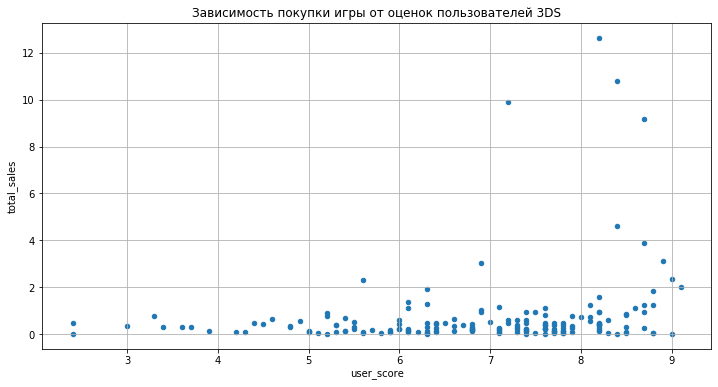

In [46]:
data_3ds.plot(x='user_score', y='total_sales', kind='scatter', figsize=(12,6), grid=True, title='Зависимость покупки игры от оценок пользователей 3DS')

Отсутствует зависимость между оценками пользователей и количеством приобретенных игр на 3DS

In [47]:
data_3ds['total_sales'].corr(data_3ds['critic_score'])

0.34873973059848346

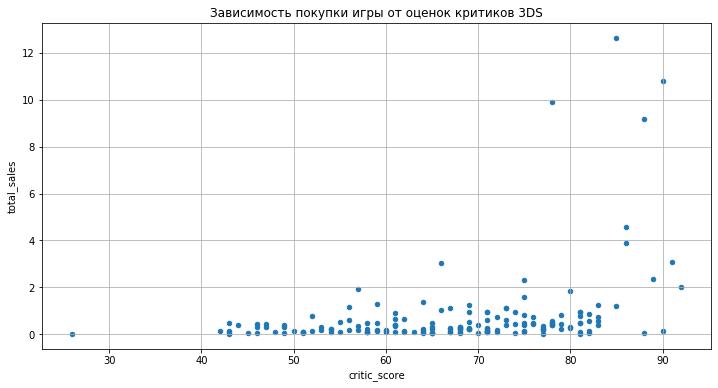

In [48]:
data_3ds.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(12,6), grid=True, title='Зависимость покупки игры от оценок критиков 3DS')

Существует очень слабая зависимость между оценками критиков и количеством приобретенных игр на X360

In [49]:
data_3ds['user_score'].corr(data_3ds['critic_score'])

0.7452221337984232

Есть зависимость между оценками пользователей и оценками критиков. Есть связь между оценками критиков и количеством проданных игр.

<b>PC

In [50]:
data_pc = data_platforms.query('platform == "PC"')
data_pc['total_sales'].corr(data_pc['user_score'])

-0.04896683233511955

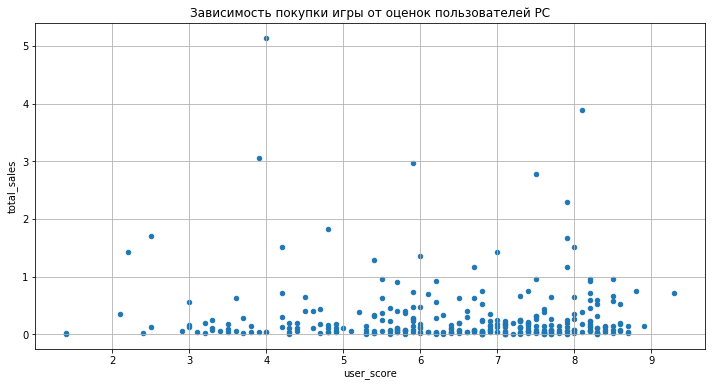

In [51]:
data_pc.plot(x='user_score', y='total_sales', kind='scatter', figsize=(12,6), grid=True, title='Зависимость покупки игры от оценок пользователей PC')

Отсутствует зависимость между оценками пользователей и количеством приобретенных игр на PC

In [52]:
data_pc['total_sales'].corr(data_pc['critic_score'])

0.3141847396903631

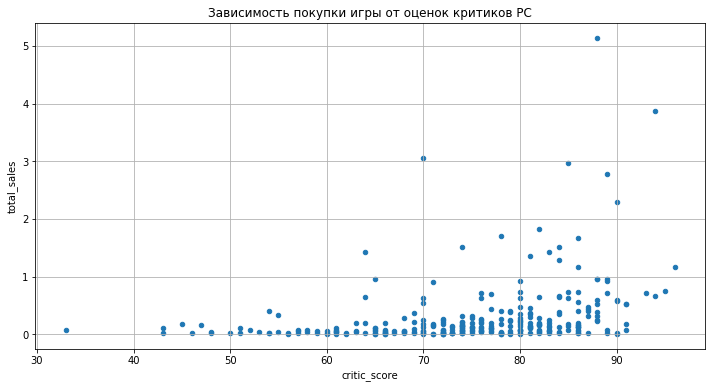

In [53]:
data_pc.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(12,6), grid=True, title='Зависимость покупки игры от оценок критиков PC')

Существует очень слабая зависимость между оценками критиков и количеством приобретенных игр на PC

In [54]:
data_pc['user_score'].corr(data_pc['critic_score'])

0.46481542642957463

Отсутствует зависимость между оценками пользователей и количеством проданных игр, есть очень слабая зависимость оценки критиков от количества проданных игр. Есть слабая связь между оценками пользователей и критиков.

<b>WiiU

In [55]:
data_wiiu = data_platforms.query('platform == "WiiU"')
data_wiiu['total_sales'].corr(data_wiiu['user_score'])

0.4002190202148617

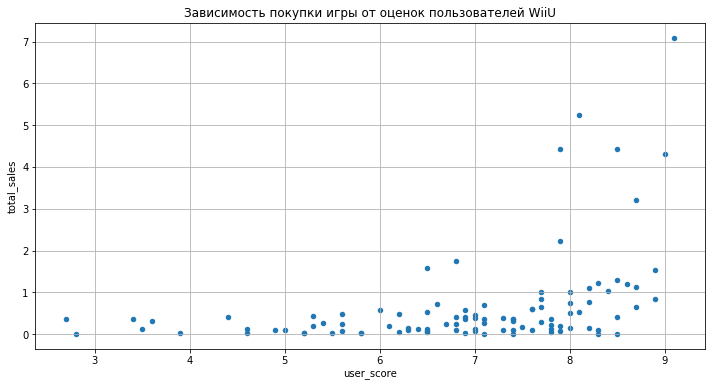

In [56]:
data_wiiu.plot(x='user_score', y='total_sales', kind='scatter', figsize=(12,6), grid=True, title='Зависимость покупки игры от оценок пользователей WiiU')

Есть слабая зависимость между оценками пользователей и количеством проданных игр.

In [57]:
data_wiiu['total_sales'].corr(data_wiiu['critic_score'])

0.3483797601201749

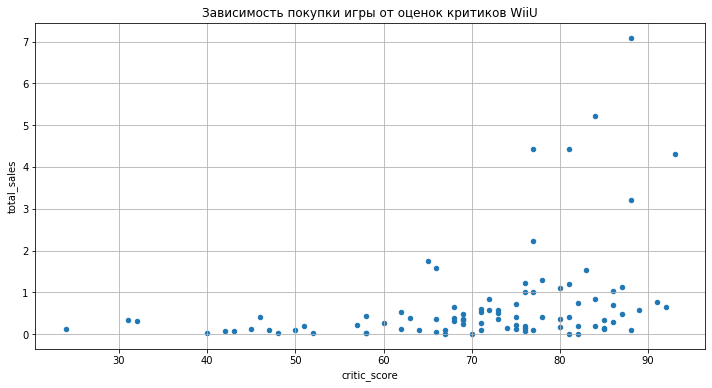

In [58]:
data_wiiu.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(12,6), grid=True, title='Зависимость покупки игры от оценок критиков WiiU')

Есть слабая зависимость между оценкой критиков и количеством приобретенных игр на DC.

In [59]:
data_wiiu['user_score'].corr(data_wiiu['critic_score'])

0.7700795968080212

Есть слабая зависимость между оценкой пользователей и критиков и количеством приобретенных игр. Выявлена зависимость между оценками пользователей и критиков.

1. В большинстве случаев отсутствует (либо очень слабая) корреляция между оценками пользователей и критиков и количеством приобретенных игр.
2. Покупатели больше прислушиваются к мнениям критиков, чем других пользователей. 

<b>Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами

In [60]:
genre_stat = platform_5_years.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
genre_stat

,total_sales
genre,
Action,557.80
Shooter,402.91
Role-Playing,245.63
Sports,237.15
Misc,139.42
Platform,88.68
Racing,88.31
Fighting,66.90
Simulation,50.26


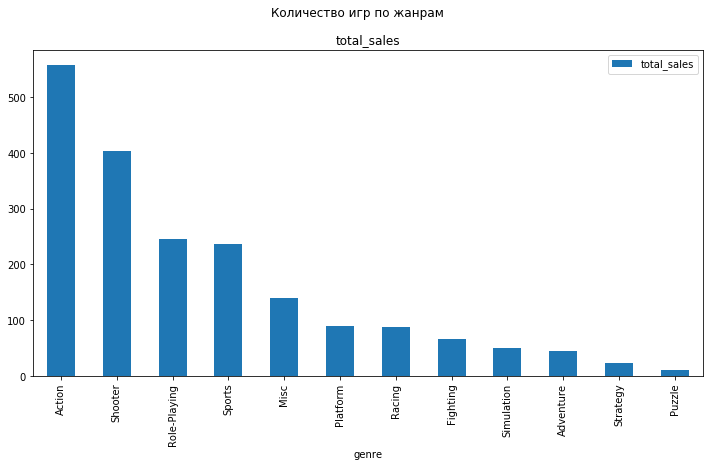

In [61]:
genre_stat.plot(kind='bar', title='Количество игр по жанрам', subplots=True, figsize=(12,6))
plt.show()

Самые популярные жанры игр – Acrion, Shooter, Role-Playing, Sports соответственно. Игры этих жанров занимают почти половину от общего числа игр. Самый непопулярный жанр – Puzzle. 

<b>Общий вывод по исследовательскому анализу данных.</b><bR>
- Самые популярные игровые платформы за весь период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS
- Потенциально прибыльные платформы: PS4, XOne, 3DS, PC, WiiU. На ближайший год стоит ориентироваться на эти платформы. Некоторые из них не достигли своего потенциального пика, который может наступить в течение ближайших лет.
- Потенциально убыточные платформы: Wii, X360 и PS3. 
- Общее количество игр достигло своего пика в 2008-2009 гг. и с тех пор идет рынок игр на платформах на спад на фоне развития мобильных приложений для смартфонов: они дешевле и требуют меньше усилий (нужно всего лишь скачать приложение и оплатить его).
- В среднем платформа "живет" 10 лет и достигает пика своей прибыли к 3-5 году работы.
- Покупатели больше прислушиваются к мнениям критиков, чем других пользователей. 
- Самые популярные жанры игр – Acrion, Shooter, Role-Playing, Sports соответственно. Игры этих жанров занимают почти половину от общего числа игр. Самый непопулярный жанр – Puzzle.  

<b>Шаг 4. Составьте портрет пользователя каждого региона

<b>4.1 Определите для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [62]:
import warnings
warnings.filterwarnings("ignore")

platform_5_years['na_part'] = platform_5_years['na_sales']/data_platforms['total_sales']
platform_5_years['eu_part'] = platform_5_years['eu_sales']/data_platforms['total_sales']
platform_5_years['jp_part'] = platform_5_years['jp_sales']/data_platforms['total_sales']

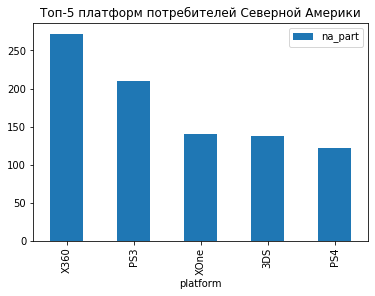

In [63]:
#самые популярные платформы потребителей Северной Америки
na_platforms = platform_5_years.pivot_table(index='platform', values='na_part', aggfunc='sum').sort_values(by='na_part', ascending=False).head(5)
na_platforms.plot(kind='bar', title='Топ-5 платформ потребителей Северной Америки')

In [64]:
na_sales_total = platform_5_years['na_part'].sum()
na_platforms['percentage'] = na_platforms['na_part']/na_sales_total*100
na_platforms = na_platforms.reset_index().rename_axis(None, axis=1)
na_platforms

,platform,na_part,percentage
0,X360,272.217661,21.465984
1,PS3,210.147340,16.571369
2,XOne,139.986898,11.038801
3,3DS,137.116642,10.812464
4,PS4,122.285754,9.642960


Самыми популярными платформами у потребителей Северной Америки являются X360 (21,5%), PS3 (16,6%), XOne (11%), 3DS (10,8%), PS4 (9.6%).

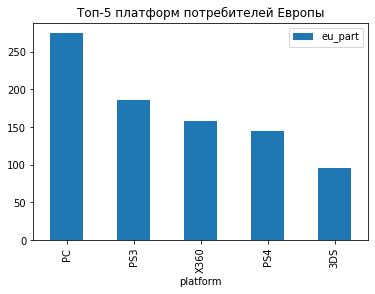

In [65]:
#самые популярные платформы потребителей Европы
eu_platforms = platform_5_years.pivot_table(index='platform', values='eu_part', aggfunc='sum').sort_values(by='eu_part', ascending=False).head(5)
eu_platforms.plot(kind='bar', title='Топ-5 платформ потребителей Европы')

In [66]:
eu_sales_total = platform_5_years['eu_part'].sum()
eu_platforms['percentage'] = eu_platforms['eu_part']/eu_sales_total*100
eu_platforms = eu_platforms.reset_index().rename_axis(None, axis=1)
eu_platforms

,platform,eu_part,percentage
0,PC,274.896677,23.470632
1,PS3,185.783445,15.862159
2,X360,158.267930,13.512889
3,PS4,144.658203,12.350893
4,3DS,95.029826,8.113631


Самыми популярными платформами у потребителей Европы являются PC (23,5%), PS3 (15,9%), X360 (13,5%), PS4 (12,4%), 3DS (8,1%).

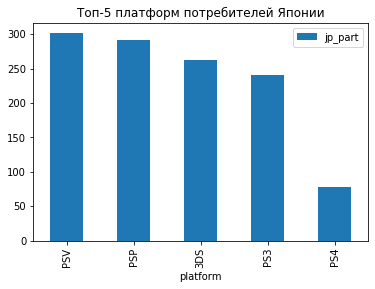

In [67]:
#самые популярные платформы потребителей Японии
jp_platforms = platform_5_years.pivot_table(index='platform', values='jp_part', aggfunc='sum').sort_values(by='jp_part', ascending=False).head(5)
jp_platforms.plot(kind='bar', title='Топ-5 платформ потребителей Японии')

In [68]:
jp_sales_total = platform_5_years['jp_part'].sum()
jp_platforms['percentage'] = jp_platforms['jp_part']/jp_sales_total*100
jp_platforms = jp_platforms.reset_index().rename_axis(None, axis=1)
jp_platforms

,platform,jp_part,percentage
0,PSV,300.966201,23.146284
1,PSP,290.763592,22.361636
2,3DS,262.703847,20.203657
3,PS3,239.882905,18.448576
4,PS4,78.451485,6.033436


Самыми популярными платформами у потребителей Японии являются PSV (23,1%), PSP (22,4%), 3DS (20,2%), PS3 (18,5%), PS4 (6%). То есть японцы предпочитают платформы собственного производства :)

В Северной Америке больше предпочитают X360, PS3, XOne, 3DS, PS4, в Европе больше предпочитают PC и играют примерно на тех же платформах за исключением XOne. В Японии потребители больше предпочитают платформы собственного производства, но преимущественно PSV, PSP, 3DS, PS3. В Японии совпадение по платформам среди других регионов только в 3DS и PS3. 

<b>4.2 Определите для пользователя каждого региона (NA, EU, JP) cамые популярные жанры (топ-5). Поясните разницу.

In [69]:
#самые популярные жанры потребителей Северной Америки
na_genre = platform_5_years.pivot_table(index='genre', values='na_part', aggfunc='sum').sort_values(by='na_part', ascending=False).head(5)
na_genre['percentage'] = na_genre['na_part']/na_sales_total*100
na_genre

,na_part,percentage
genre,,
Action,389.050869,30.678978
Sports,154.469038,12.180803
Misc,151.320530,11.932525
Shooter,150.478912,11.866158
Role-Playing,97.330809,7.675114


Самыми популярными жанрами игр у потребителей Северной Америки являются Acrion (30,7%), Sports (12,2%), Misc (11,9%), Shooter (11,9%), Racing (7,7%)

In [70]:
#самые популярные жанры потребителей Европы
eu_genre = platform_5_years.pivot_table(index='genre', values='eu_part', aggfunc='sum').sort_values(by='eu_part', ascending=False).head(5)
eu_genre['percentage'] = eu_genre['eu_part']/eu_sales_total*100
eu_genre

,eu_part,percentage
genre,,
Action,368.434904,31.456910
Sports,142.411288,12.159052
Shooter,124.507531,10.630432
Racing,92.548092,7.901740
Misc,83.977498,7.169985


Самыми популярными жанрами игр у потребителей Европы являются Acrion (31,5%), Sports (12,2%), Shooter (10,6%), Racing (7,9%), Misc (7,2%)

In [71]:
#самые популярные жанры потребителей Японии
jp_genre = platform_5_years.pivot_table(index='genre', values='jp_part', aggfunc='sum').sort_values(by='jp_part', ascending=False).head(5)
jp_genre['percentage'] = jp_genre['jp_part']/jp_sales_total*100
jp_genre

,jp_part,percentage
genre,,
Action,422.918007,32.525182
Role-Playing,267.370738,20.562572
Adventure,256.378608,19.717205
Misc,117.504750,9.036890
Sports,56.476264,4.343397


Самыми популярными жанрами игр у потребителей Японии являются Action (32,5%), Role-Playing (20,6%), Adventure (19,7%), Misc (9%), Sports (4,3%)

Самый распространенный жанр игр – Action. Он лидирует в Северной Америке, Европе и Японии.<bR>
В Северной Америке и Европе вторым самым распространенным жанром является Sport. В Японии вторым по очереди жанром является Role-Playing, в который играет каждый пятый японец.<bR>
В общем топ-5 жанров в Северной Америке и Европе совпадают. <bR>
Пользователи Японии больше всех интересуются жанрами Role-Playing и Adventure

<b>4.3 Определите для пользователя каждого региона (NA, EU, JP) влияет ли рейтинг ESRB на продажи в отдельном регионе?

<b>Самые популярные рейтинги игр, которые приобретают в Северной Америки

In [72]:
na_esrb = platform_5_years.groupby(by='rating').agg({'na_part':'sum'}).sort_values(by='na_part', ascending=False).head(5)
na_esrb['percentage'] = na_esrb/na_esrb.sum()*100
na_esrb

,na_part,percentage
rating,,
E,288.792916,28.173689
M,271.876120,26.523342
T,242.159442,23.624281
E10+,221.282914,21.587635
EC,0.933333,0.091053


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b19869090>,
      dtype=object)

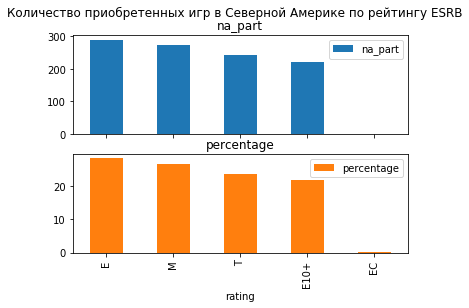

In [73]:
na_esrb.plot(kind='bar', subplots=True, title='Количество приобретенных игр в Северной Америке по рейтингу ESRB')

В Северной Америке большая часть приобретенных игр соответствует рейтингу E – «Для всех» («Everyone»). Средующие по очередности рейтинг M – «Для взрослых» («Mature»), предназначенный для людей старше 17 лет, T – «Подросткам» («Teen»), затем E10+ «Для всех от 10 лет и старше»(«Everyone 10 and older»),  Игры с рейтингом, которые покупают реже всего – «EC» («Early childhood») — «Для детей младшего возраста».

<b>Самые популярные рейтинги игр, которые приобретают в Европе

In [74]:
eu_esrb = platform_5_years.groupby(by='rating').agg({'eu_part':'sum'}).sort_values(by='eu_part', ascending=False).head(5)
eu_esrb['percentage'] = eu_esrb/eu_esrb.sum()*100
eu_esrb

,eu_part,percentage
rating,,
E,241.327901,28.682065
M,239.854966,28.507005
T,188.944517,22.456247
E10+,170.512173,20.265544
RP,0.750000,0.089138


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b193052d0>,
      dtype=object)

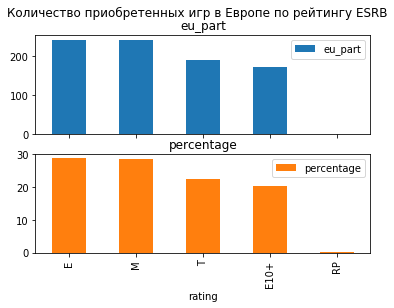

In [75]:
eu_esrb.plot(kind='bar', subplots=True, title='Количество приобретенных игр в Европе по рейтингу ESRB')

В Европе большая часть приобретенных игр соответствует рейтингу E – «Для всех» («Everyone»). Средующие по очередности рейтинги M – «Для взрослых» («Mature»), предназначенный для людей старше 17 лет, T – «Подросткам» («Teen»),  и E10+ «Для всех от 10 лет и старше»(«Everyone 10 and older»). В столбце есть рейтинг RP, обозначающий ожидание рейтинга.

<b>Самые популярные рейтинги игр, которые приобретают в Японии

In [76]:
jp_esrb = platform_5_years.groupby(by='rating').agg({'jp_part':'sum'}).sort_values(by='jp_part', ascending=False).head(5)
jp_esrb['percentage'] = jp_esrb/jp_esrb.sum()*100
jp_esrb

,jp_part,percentage
rating,,
T,130.711711,57.528836
M,43.459146,19.127239
E,32.543564,14.323073
E10+,20.496349,9.020853
EC,0.000000,0.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b192626d0>,
      dtype=object)

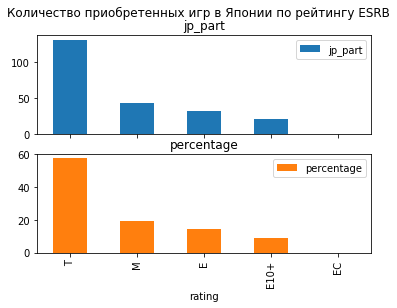

In [77]:
jp_esrb.plot(kind='bar', subplots=True, title='Количество приобретенных игр в Японии по рейтингу ESRB')

В Японии большая часть приобретенных игр соответствует рейтингу T – «Подросткам» («Teen»), игра с таким рейтингом подходит для лиц от 13 лет и старше, затем M – «Для взрослых» («Mature»), предназначенный для людей старше 17 лет, следом E – «Для всех» («Everyone») и рейтинг E10+ – «Для всех от 10 лет и старше»(«Everyone 10 and older»).

Рейтинги игр по ESRB совпадают в Северной Америке и Европе: в топ-4 входят одни и те же рейтинги в похожей пропорции. В Японии более половины игр соответствуют рейтингу T. Самими непопулярными играми являются игры, ожидающий рейтинг.

In [78]:
#кол-во проданных игр в Северной Америке
platform_5_years['na_part'].sum()

1268.1350484667305

In [79]:
#кол-во проданных игр в Европе
platform_5_years['eu_part'].sum()

1171.2367908884435

In [80]:
#кол-во проданных игр в Японии
platform_5_years['jp_part'].sum()

1300.2786843168417

Портрет пользователей Северной Америки:
    - Самые популярные платформы: X360 (21,5%), PS3 (16,6%), XOne (11%), 3DS (10,9%), PS4 (9,6%).
    - Самые популярные жанры игр: Acrion (31,5%), Sports (12,2%), Shooter (10,6%), Racing (7,9%), Misc (7,2%).
    - Самые популярные рейтинги игр по ESRB: E, M, T, E10+.
    - Самые непопулярные рейтинги игр по ESRB: EC.
        
Портрет пользователей Европы:
    - Самые популярные платформы: PC (23,5%), PS3 (15,9%), X360 (13,5%), PS4 (12,4%), 3DS (8,1%)).
    - Самые популярные жанры игр: Acrion (31,5%), Sports (12,2%), Shooter (10,6%), Racing (7,9%), Misc (7,2%).
    - Самые популярные рейтинги игр по ESRB: E, M, T, E10+.
    - Самые непопулярные рейтинги игр по ESRB: RP (ожидающие рейтинга)
    
Портрет пользователей Японии:
    - Самые популярные платформы: PSV (23,1%), PSP (22,49%), 3DS (20,2%), PS3 (18,5%), PS4 (6%).
    - Самые популярные жанры игр: Action (32,5%), Role-Playing (20,6%), Adventure (19,7%), Misc (9%), Sports (4,3%)
    - Самые популярные рейтинги игр по ESRB:  T, M, E, E10+
    
Пользователи Северной Америки приобретают самое большое количество игр. А поскольку пользователи Европы в целом похожи на потребителей Северной Америки, образуется большая аудитория людей, приобретающих игры. Стоит ориентироваться на эти сегменты.

<b>Шаг 5. Проверьте гипотезы

<b>- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Поскольку выборки независимы друг от друга, для проверки гипотез используется тест Стьюдента.

H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые <bR>
H1 – Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [81]:
platform_5_years['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'Wii', 'DS', 'XOne', 'WiiU', 'PC',
       'PSV', 'PSP', 'PS2'], dtype=object)

In [82]:
#выделяем значения Xbox One и PC с отзывами 
xone = platform_5_years.loc[(data['platform'] == 'XOne') & (data['user_score'] > 0)]['user_score']
pc = platform_5_years.loc[(data['platform'] == 'PC') & (data['user_score'] > 0)]['user_score']

In [83]:
#средний пользовательский рейтинг для Xbox One
xone.mean()

6.521428571428572

In [84]:
#средний пользовательский рейтинг для PC
pc.mean()

6.451791530944625

In [85]:
import numpy as np
np.var(xone, ddof=1)

1.9069968429360695

In [86]:
np.var(pc, ddof=1)

2.5962957995358837

In [87]:
from scipy import stats as st

alpha = 0.05

results = st.ttest_ind(
    xone,
    pc,
    equal_var = False) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6130712247638477
Не получилось отвергнуть нулевую гипотезу


Исходя из результатов t-теста средний пользовательский рейтинг Xbox One не отличается от среднего пользовательского рейтинга PC.

<b>- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые. <bR>
H1: Средние пользовательские рейтинги жанров Action и Sports различаются. 


In [88]:
#выделяем жанры Action и Sports
action_genre = platform_5_years.loc[(data['genre'] == 'Action') & (data['user_score'] > 0)]['user_score']
sports_genre = platform_5_years.loc[(data['genre'] == 'Sports') & (data['user_score'] > 0)]['user_score']

In [89]:
#средний пользовательский рейтинг для Action
action_genre.mean()

6.775903614457831

In [90]:
#средний пользовательский рейтинг для Sports
sports_genre.mean()

5.650813008130081

In [91]:
np.var(action_genre, ddof=1)

1.8118770103036579

In [92]:
np.var(sports_genre, ddof=1)

2.8825095404015264

In [93]:
alpha = 0.05

results = st.ttest_ind(
    action_genre,
    sports_genre,
    equal_var = False) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.285648549432565e-19
Отвергаем нулевую гипотезу


Исходя из результатов t-теста cредние пользовательские рейтинги жанров Action и Sports различаются.

In [94]:
!pip install pingouin

Defaulting to user installation because normal site-packages is not writeable


H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые <bR>
H1 – Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [95]:
from pingouin import ttest
ttest(xone, pc, paired=True, tail='one-sided').round(2)
# if (results.pvalue < alpha):
#     print("Отвергаем нулевую гипотезу")
# else:
#     print("Не получилось отвергнуть нулевую гипотезу")

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,0.51,426.68,greater,0.31,"[-0.16, inf]",0.05,0.235,0.12


pvalue больше alpha (0.05). Соответственно средний пользовательский рейтинг Xbox One не отличается от среднего пользовательского рейтинга PC.

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые. <bR>
H1: Средние пользовательские рейтинги жанров Action и Sports различаются. 


In [96]:
from pingouin import ttest
ttest(action_genre, sports_genre, paired=True, tail='one-sided').round(2)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,9.36,365.08,greater,0.0,"[0.93, inf]",0.78,1.31e+17,1.0


pvalue меньше alpha (0.05). Соответственно средние пользовательские рейтинги жанров Action и Sports различаются. 

<b>Шаг 6. Напишите общий вывод

Датафрейм содержит 16,7 тысяч строк и 11 столбцов.<bR>
Самое большое кол-во копий продали PS2, самую меньшее кол-во – DS. <bR>
Игровые платформы прибыльны примерно 10 лет и достигают пика прибыли на 3-5 год работы, затем идут на спад. В целом рынок платформ идет на спад.<bR>
Пользователи Северной Америки приобретают самое большое количество игр. А поскольку потребители Европы в целом похожи на потребителей Северной Америки, образуется большая аудитория людей, которым можно предложить похожие игры. <bR>
Стоит настроить рекламную кампанию игр на аудиторию Северной Америки, меньше на аудиторию Европы и Японии. Игры предложить по следующим критериям:<bR>
- для платформ X360, PS3, XOne, 3DS, PS4.
- жанры игр: Acrion, Sports, Shooter
- рейтинги игр по ESRB: E, M, T, E10+.